<a href="https://colab.research.google.com/github/JasmineD0401/SMA-LABS/blob/main/Text_Analytics_Model_(lab_10)).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DATASET**[reviews.csv](https://drive.google.com/file/d/1G24BIsWXpQj9TaQta0--dqOr_IhcBuZT/view?usp=sharing)

In [6]:
import pandas as pd
import nltk
nltk.download('vader_lexicon')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# Download NLTK resources (stopwords and WordNet)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


# Load the dataset
df = pd.read_csv('reviews.csv')


# Define stopwords and punctuation
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)


# Initialize WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()


# Function to preprocess text
def preprocess_text(text):

  # Tokenization
  tokens = word_tokenize(str(text))

  # Lowercasing and removing stopwords/punctuation
  tokens = [token.lower() for token in tokens if token.lower() not
in stop_words and token.lower() not in punctuation]

  # Lemmatization
  tokens = [lemmatizer.lemmatize(token) for token in tokens]

  # Join tokens back into a single string
  preprocessed_text = ' '.join(tokens)
  return preprocessed_text

# Apply preprocessing to 'Review' column
df['Preprocessed_Review'] = df['Review'].apply(preprocess_text)

# Display the preprocessed text
print(df[['Review', 'Preprocessed_Review']].head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                              Review  \
0  Been to this place 3-4 times. Prakash is alway...   
1  I recently visited Oliver Brown on a weekend f...   
2                         Very watery ans thin shake   
3  it was not cheese burst pizza.. only cheeze wa...   
4  Yammi.,....test burger is best I love 💗 this B...   

                                 Preprocessed_Review  
0  place 3-4 time prakash always sweet accommodat...  
1  recently visited oliver brown weekend cup iced...  
2                               watery an thin shake  
3  cheese burst pizza .. cheeze top .. happy pizz...  
4  yammi. .... test burger best love 💗 bergerand ...  


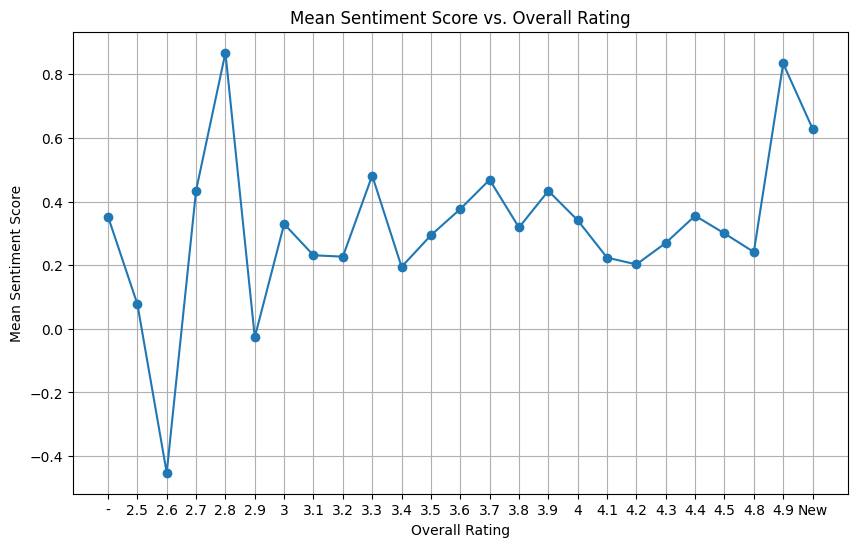



Number of Positive Sentiments: 495
Number of Negative Sentiments: 163
Number of Neutral Sentiments: 117


Overall Average Sentiment Score: 0.3453789677419355




Cafe with the Highest Sentiment Score: Isobel
Cafe with the Lowest Sentiment Score: Cafe +



Top Positive Review:
 Customer service really good Have an great different design’s view while going from the stairsTheir are three seating area’s 1. One is the out dining which is more beautiful the out seating area is really awesome have beautiful ambience with comfortable sofas,to have great relaxation having a sheesha in front 2. Next seating is inside the cafe where u will get awesome enjoymentHaving an French pool board at the center of the cafe and all around relaxing sofas With dj and just in front of the pool board different types of sheesha’s are kept which are really awesome 3. The last seating area is the personal seating area Which is great to have an personal space with friends and...read more

Top Negative Review:
 If

In [9]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Initialize VADER Sentiment Intensity Analyzer
sid = SentimentIntensityAnalyzer()

# Sentiment Analysis
df['Sentiment'] = df['Preprocessed_Review'].apply(lambda x:
sid.polarity_scores(x)['compound'])
# Calculate mean sentiment score for each cafe
cafe_sentiment = df.groupby('Name')['Sentiment'].mean()
# Count number of positive, negative, and neutral sentiments
positive_count = (df['Sentiment'] > 0).sum()
negative_count = (df['Sentiment'] < 0).sum()
neutral_count = (df['Sentiment'] == 0).sum()
# Visualization of Sentiment Analysis
plt.figure(figsize=(10, 6))
# Grouping by 'Overall_Rating' and calculating mean sentiment for each rating
rating_sentiment = df.groupby('Overall_Rating')['Sentiment'].mean()
# Plotting line graph
plt.plot(rating_sentiment.index, rating_sentiment.values, marker='o',
linestyle='-')

# Customizing axes and labels
plt.xlabel('Overall Rating')
plt.ylabel('Mean Sentiment Score')
plt.title('Mean Sentiment Score vs. Overall Rating')
plt.grid(True)
plt.show()
print("\n")
# Print counts of positive, negative, and neutral sentiments
print("Number of Positive Sentiments:", positive_count)
print("Number of Negative Sentiments:", negative_count)
print("Number of Neutral Sentiments:", neutral_count)
print("\n")
# Additional Analysis Steps
# Calculate overall average sentiment score
overall_avg_sentiment = df['Sentiment'].mean()
print("Overall Average Sentiment Score:", overall_avg_sentiment)
print("\n")
# Identify cafes with the highest and lowest sentiment scores
highest_sentiment_cafe = cafe_sentiment.idxmax()
lowest_sentiment_cafe = cafe_sentiment.idxmin()
print("\n")
print("Cafe with the Highest Sentiment Score:",
highest_sentiment_cafe)
print("Cafe with the Lowest Sentiment Score:", lowest_sentiment_cafe)
# Identify top positive and negative reviews
top_positive_review = df.loc[df['Sentiment'].idxmax(), 'Review']
top_negative_review = df.loc[df['Sentiment'].idxmin(), 'Review']
print("\n")
print("\nTop Positive Review:\n", top_positive_review)
print("\nTop Negative Review:\n", top_negative_review)
# Identify hotel with the highest positive sentiment
highest_positive_hotel = cafe_sentiment.idxmax()
# Identify hotel with the highest negative sentiment
highest_negative_hotel = cafe_sentiment.idxmin()
print("\n")
print("Hotel with the Highest Positive Sentiment:",
highest_positive_hotel)
print("Hotel with the Highest Negative Sentiment:",
highest_negative_hotel)


**NAMED ENTITY RECOGNITION**

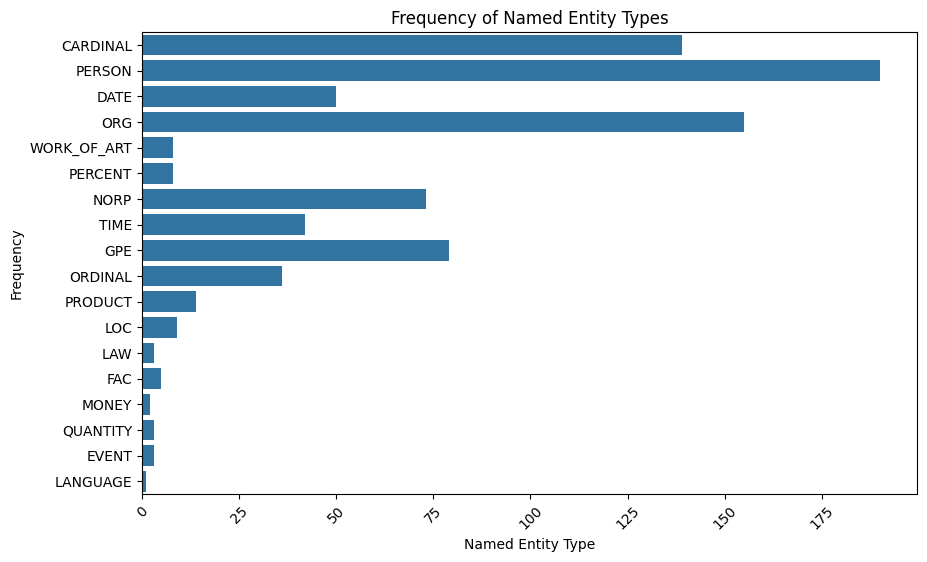

In [11]:
import spacy
import seaborn as sns
import matplotlib.pyplot as plt
# Load spaCy's English model
nlp = spacy.load('en_core_web_sm')
# Function to perform NER on a text
def perform_ner(text):
  doc = nlp(text)
  entities = [ent.label_ for ent in doc.ents]
  return entities
# Extract named entities and visualize their frequency
named_entity_types = []
for review in df['Review']:
  named_entity_types.extend(perform_ner(review))
# Plot named entity types
plt.figure(figsize=(10, 6))
sns.countplot(named_entity_types)
plt.xlabel('Named Entity Type')
plt.ylabel('Frequency')
plt.title('Frequency of Named Entity Types')
plt.xticks(rotation=45)
plt.show()

**TF-IDF**

<ipython-input-15-ff5560c5e679>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TF-IDF Score', y='Keyword', data=top_keywords,


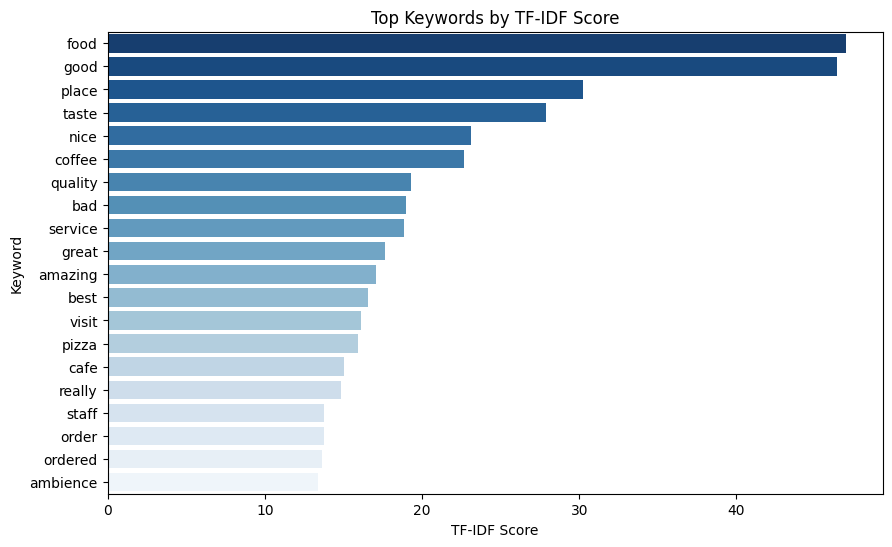

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
# Initialize TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000,
stop_words='english')
# Fit and transform the preprocessed reviews
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Preprocessed_Review'])
# Get feature names (keywords)
feature_names = tfidf_vectorizer.get_feature_names_out()
# Calculate TF-IDF scores for each feature
tfidf_scores = tfidf_matrix.sum(axis=0).A1
# Create a DataFrame for keywords and their TF-IDF scores
keywords_df = pd.DataFrame({'Keyword': feature_names, 'TF-IDF Score':
tfidf_scores})
# Sort keywords by TF-IDF score
top_keywords = keywords_df.sort_values(by='TF-IDF Score',
ascending=False).head(20)
# Plot top keywords
plt.figure(figsize=(10, 6))
sns.barplot(x='TF-IDF Score', y='Keyword', data=top_keywords,
palette='Blues_r')
plt.xlabel('TF-IDF Score')
plt.ylabel('Keyword')
plt.title('Top Keywords by TF-IDF Score')
plt.show()